Implement 3 descriptive techniques:

1. popularity. Show the degree distribution, test if it follows a scale free degree distribution
    1. fit the scale-free pdf to the degree distribution
    2. test the hypothesis that the degrees were generated from the fitted distribution
    3. plot the log scale degree distribution. If it is linear with a negative slope that indicates a scale-free distribution
        

2. centrality
    1. measure centrality of political elites
    2. size nodes according to their centrality
    3. probably apply a measure of betweenness centrality
    

3. assortative mixing. homophily. Do this with the retweet network rather than the follower network.
    1. calculate assortivity coefficients
    

In [43]:
library(igraph)

## Data prep

In [56]:
# load follower adjacency matrix. matrix named 'y'
load('Barbera/adj-matrix-US.rdata')

# load the retweets data. df named 'retweets'
load('Barbera/retweets-data.rdata')

# load the users data. df named 'users'
load('Barbera/users-data-US.rdata')

# load elites data. df named 'results'
load('Barbera/results-elites-US.rdata')

In [126]:
head(users)

,theta,alpha,state,country,uzip,lat,lon,type,uid
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
213795,-1.4800342,-1.475352,Georgia,United States,30303,33.74831,-84.39111,NA,us1
300363,-0.3878467,-1.853607,Maryland,United States,21154,39.66798,-76.37919,NA,us10
245845,0.1688528,-1.684275,Alaska,United States,NA,NA,NA,NA,us100
139520,0.8711387,-2.063020,Texas,United States,75254,32.95398,-96.81689,NA,us1000
184679,0.6074411,-1.337793,Pennsylvania,United States,17033,40.28532,-76.65105,NA,us10000
242790,-1.0361716,-1.485082,North Carolina,United States,28801,35.59846,-82.55314,NA,us100000


In [128]:
elites <- results[,c(1,2)]
colnames(elites) <- c('uid', 'ideal_point')

followers <- users[,c('uid', 'theta')]
colnames(followers) <- c('uid', 'ideal_point')

nodes <- rbind(followers, elites)

In [137]:
head(elites)
nodes[nodes$uid=='BarackObama',]

,uid,ideal_point
,<chr>,<dbl>
phi[1],BarackObama,-1.51442170
phi[2],nytimes,-0.87920476
phi[3],Schwarzenegger,-0.03773341
phi[4],algore,-1.33198070
phi[5],maddow,-1.98173386
phi[6],FoxNews,1.25326182


,uid,ideal_point
,<chr>,<dbl>
phi[1],BarackObama,-1.514422


In [54]:
# subset into left and right based on theta
# calculate degree for each uid
# fit power law
# subset to candidate specific tweets
obama <- retweets[retweets$candidate == 'Obama',c(2,3)]
romney <- retweets[retweets$candidate == 'Romney',c(2,3)]

## Popularity followers

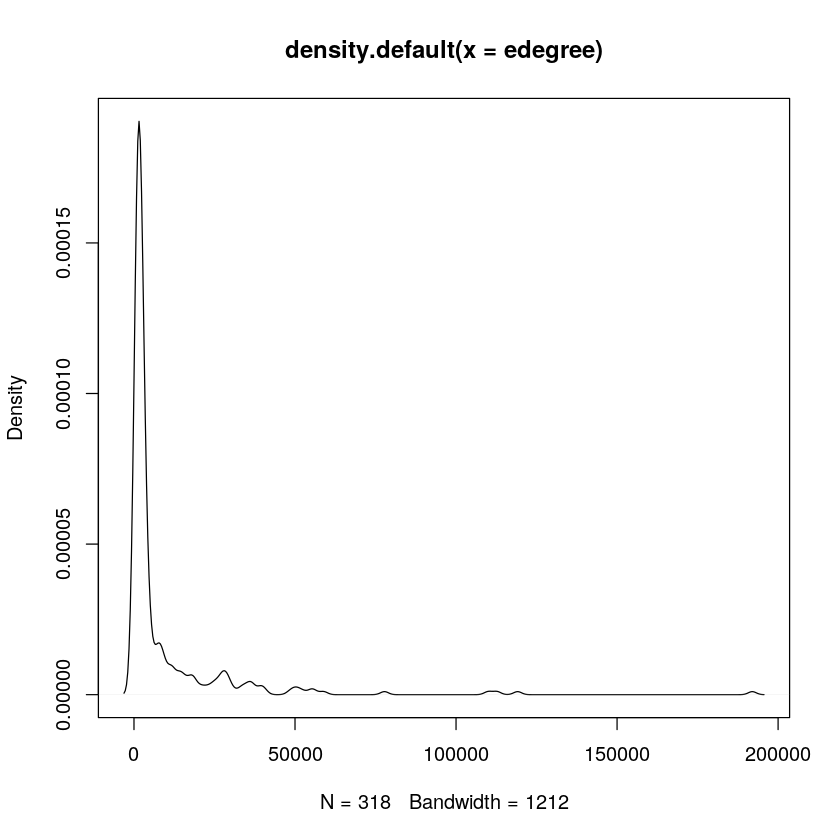

In [32]:
# plot the degree distribution for elites

# sum the columns for elites
edegree <- as.matrix(colSums(y))
# plot the distribution
plot(density(edegree))

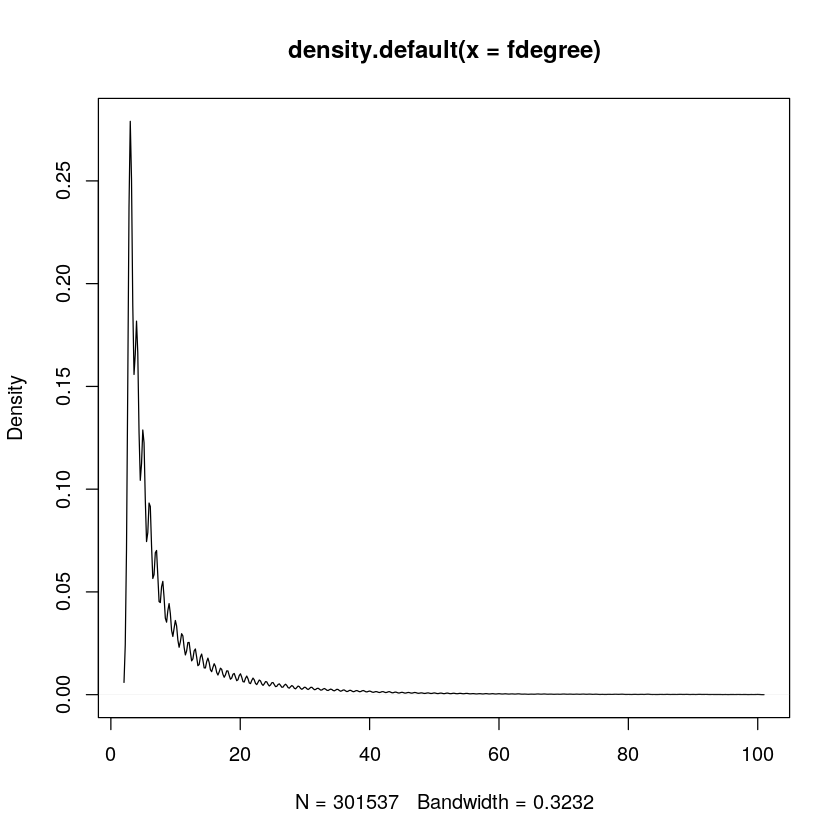

In [33]:
# sum the columns for followers
fdegree <- as.matrix(rowSums(y))
# plot the distribution
plot(density(fdegree))

In [67]:
fit_power_law(edegree)

$continuous
[1] FALSE

$alpha
[1] 1.701113

$xmin
[1] 846

$logLik
[1] -2789.346

$KS.stat
[1] 0.05297508

$KS.p
[1] 0.3834277

## Popularity retweet

In [64]:
g_retweet <- graph_from_edgelist(as.matrix(retweets[,c(2,3)]))

In [65]:
d_retweet <- degree(g_retweet)

In [74]:
head(d_retweet)

us135442 us118125 us255236 us146998 us177706  us32651 
       4        1       41        5        3       16

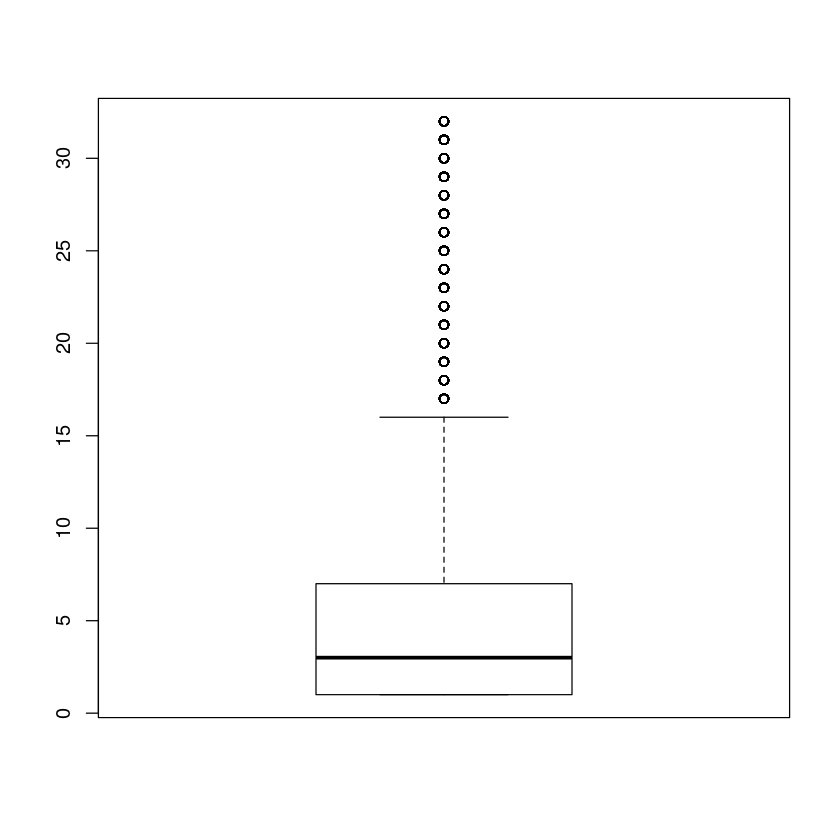

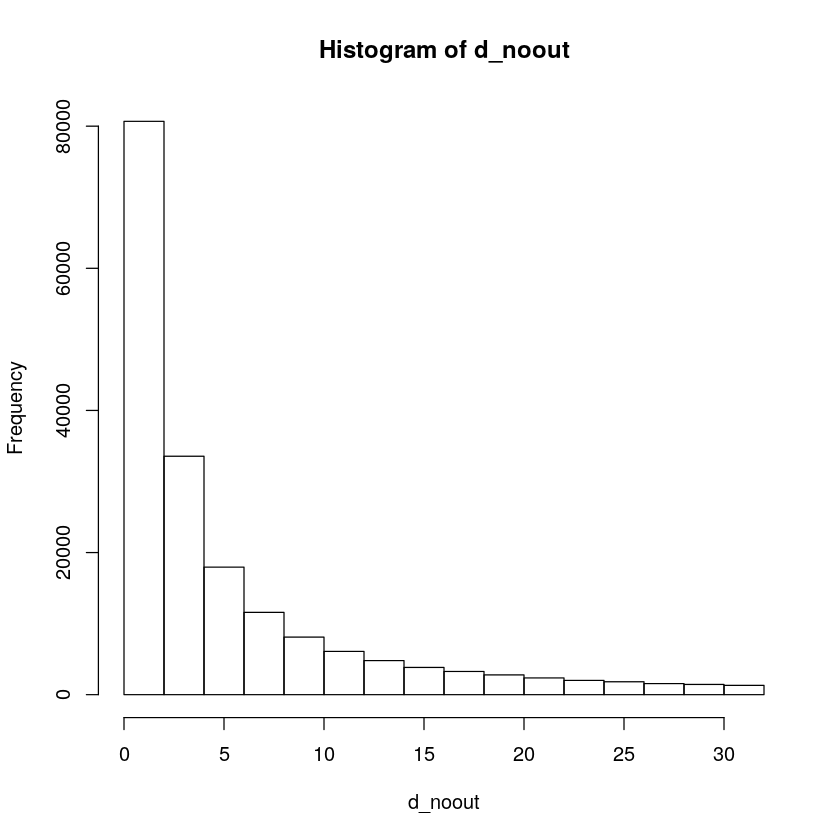

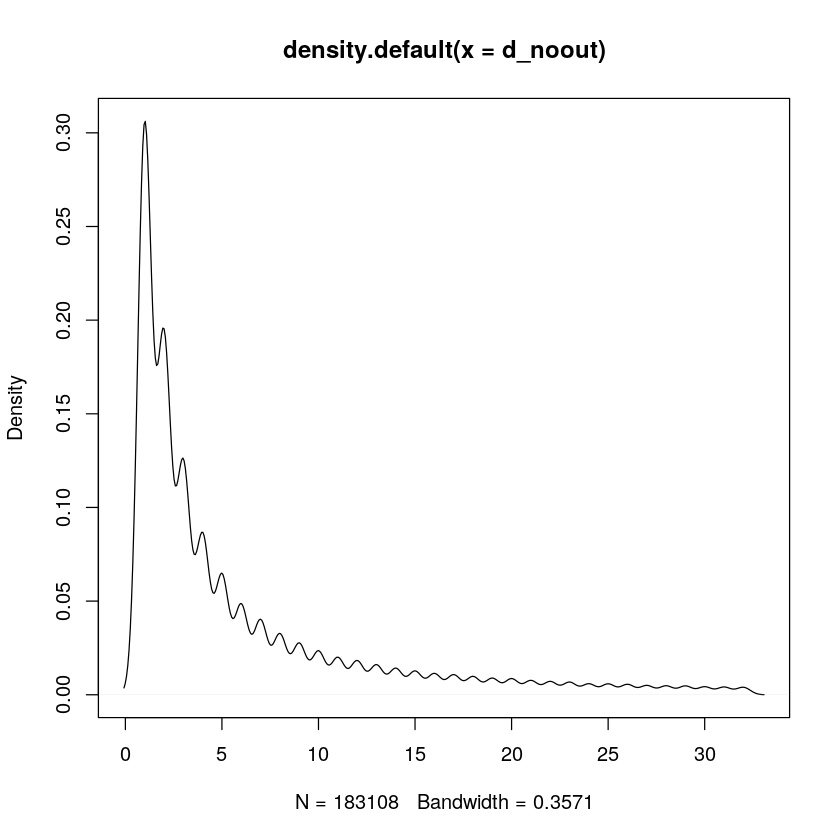

In [82]:
# identify outliers and remove them
outliers <- boxplot(d_retweet, plot = FALSE)$out
d_noout <- d_retweet[-which(d_retweet %in% outliers)]
# plot without outliers
boxplot(d_noout)
noout_hist <- hist(d_noout)
plot(density(d_noout))

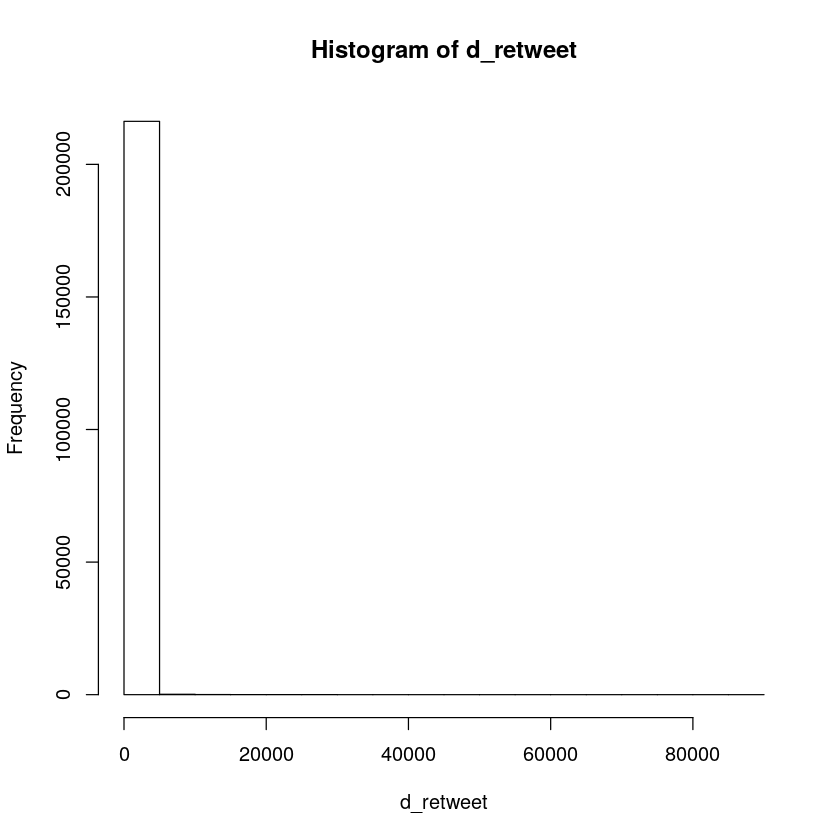

In [80]:
d_hist <- hist(d_retweet)

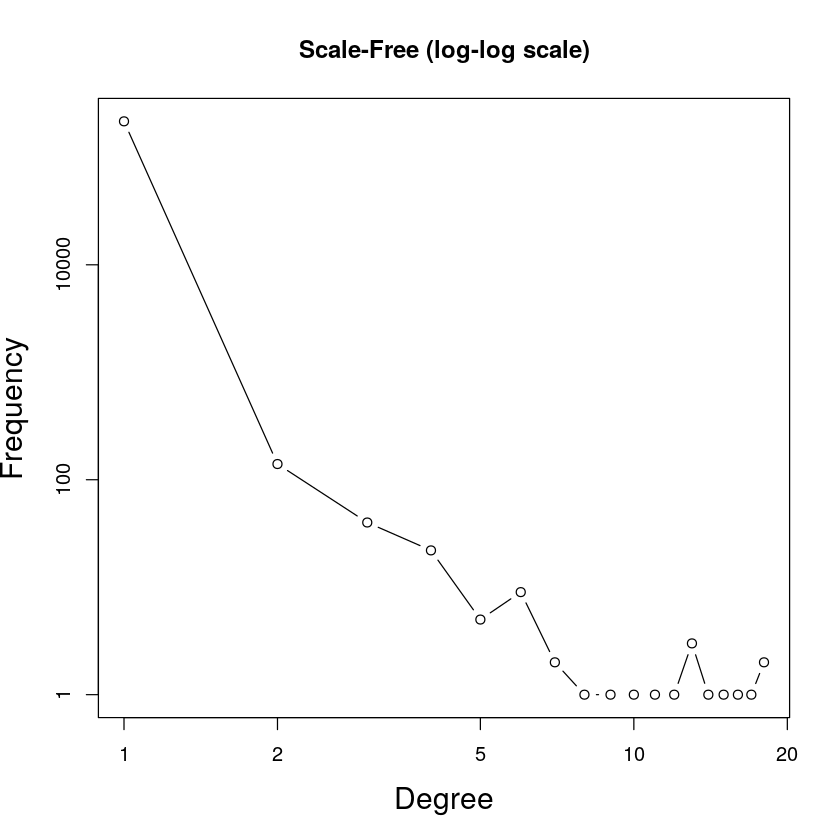

In [81]:
plot(1:length(d_hist$counts), d_hist$counts+1, xlab = "Degree", ylab = "Frequency", cex.lab = 1.5, main = "Scale-Free (log-log scale)", log = "xy", type = "b")

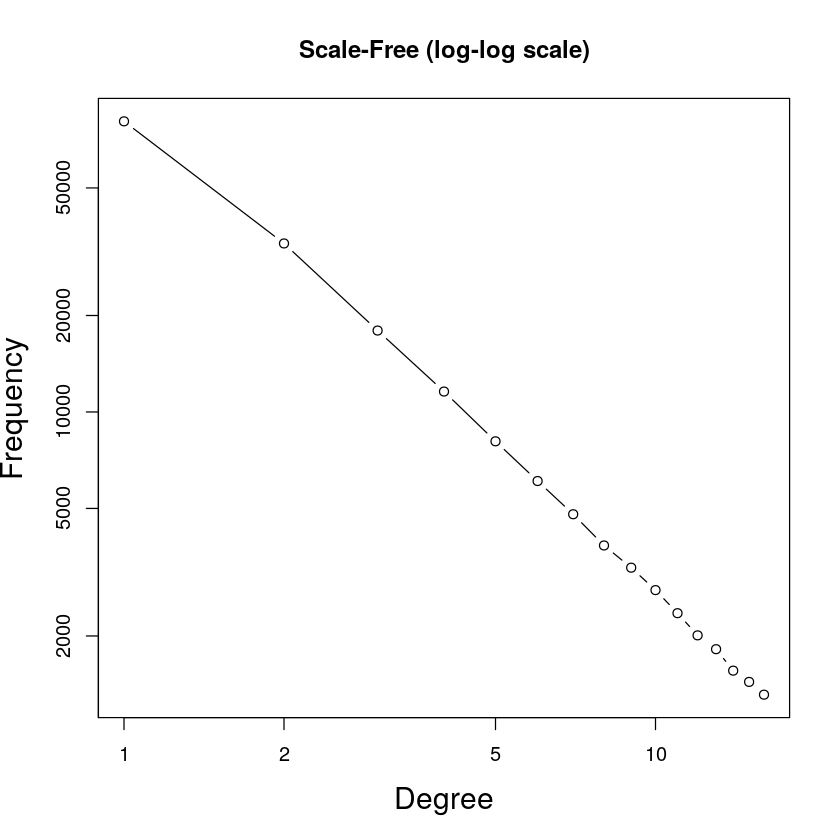

In [83]:
plot(1:length(noout_hist$counts), noout_hist$counts+1, xlab = "Degree", ylab = "Frequency", cex.lab = 1.5, main = "Scale-Free (log-log scale)", log = "xy", type = "b")

In [66]:
# seems to follow preferential attachment
fit_power_law(d_retweet)

$continuous
[1] FALSE

$alpha
[1] 2.487881

$xmin
[1] 1434

$logLik
[1] -11446.73

$KS.stat
[1] 0.01664783

$KS.p
[1] 0.8515818

In [79]:
# when you drop outliers it no long follows preferential attachment
fit_power_law(d_noout)

$continuous
[1] FALSE

$alpha
[1] 1.964872

$xmin
[1] 3

$logLik
[1] -308565.7

$KS.stat
[1] 0.1005658

$KS.p
[1] 0

## Assortativity

1. add vertex attributes
2. get assortativity coefficient

In [147]:
# identify nodes in the retweet edge list that don't have a point estimate
missing <- edgeids[-which(edgeids %in% nodes$uid)]
# remove nodes with no point estimate
g_retweet <- delete_vertices(g_retweet, missing)
# create a new edge list
retweets_clean <- as_data_frame(g_retweet, what = 'edges')

# create a new graph object from clean edge list and node list
g <- graph_from_data_frame(retweets_clean, directed = TRUE, vertices = nodes)

In [153]:
# check for preferential attachment in the new network
fit_power_law(degree(g))

$continuous
[1] FALSE

$alpha
[1] 2.490669

$xmin
[1] 1438

$logLik
[1] -11301.06

$KS.stat
[1] 0.01641566

$KS.p
[1] 0.8681149

In [155]:
# get the assortativity coeff
assortativity(g, types1 = V(g)$ideal_point)

[1] 0.7462079

## Transitivity

In [158]:
transitivity(g, 'global')

[1] 0.04747556

In [159]:
transitivity(g, 'local')

[1] 0.000000e+00 1.333333e-01 0.000000e+00          NaN 0.000000e+00
    [6] 0.000000e+00 8.381375e-02          NaN          NaN 1.338217e-01
   [11]          NaN          NaN 1.831731e-01 9.090909e-02          NaN
   [16] 6.617647e-02 0.000000e+00          NaN 0.000000e+00 6.666667e-02
   [21]          NaN          NaN          NaN 1.000000e-01          NaN
   [26]          NaN          NaN          NaN 0.000000e+00          NaN
   [31]          NaN 1.333333e-01          NaN 0.000000e+00 3.346902e-02
   [36] 3.208556e-02          NaN          NaN 0.000000e+00 0.000000e+00
   [41]          NaN 3.333333e-01 5.000000e-01 1.785384e-01          NaN
   [46] 0.000000e+00          NaN 2.852416e-02 1.634394e-01          NaN
   [51] 1.555556e-01 2.121212e-01          NaN 1.394917e-02 1.000000e+00
   [56]          NaN 2.222222e-01          NaN          NaN 6.060606e-02
   [61] 0.000000e+00          NaN          NaN          NaN          NaN
   [66]          NaN 9.629045e-02 1.985294e-01 0.000000e+00          NaN
   [71] 1.516449e-01 9.523810e-02          NaN          NaN          NaN
   [76]          NaN 0.000000e+00          NaN 9.569322e-02          NaN
   [81]          NaN          NaN 1.000000e-01          NaN 4.615385e-02
   [86] 0.000000e+00          NaN 7.142857e-02          NaN          NaN
   [91] 0.000000e+00 3.333333e-01          NaN 4.000000e-01 2.240896e-03
   [96]          NaN 0.000000e+00          NaN          NaN 1.000000e+00
  [101] 3.333333e-01 0.000000e+00          NaN 8.306922e-02          NaN
  [106]          NaN          NaN 1.077666e-02 1.272727e-01          NaN
  [111]          NaN          NaN          NaN 0.000000e+00          NaN
  [116]          NaN 0.000000e+00          NaN          NaN          NaN
  [121]          NaN 3.214286e-01 0.000000e+00          NaN 0.000000e+00
  [126] 4.934313e-02 1.038961e-01 5.555556e-02 3.555556e-01          NaN
  [131]          NaN 1.333333e-01          NaN 1.666667e-01          NaN
  [136] 0.000000e+00 1.272727e-01 4.756871e-02 1.000000e-01          NaN
  [141]          NaN          NaN 1.040293e-01          NaN 0.000000e+00
  [146]          NaN 2.380952e-01 0.000000e+00 0.000000e+00          NaN
  [151] 0.000000e+00 1.000000e+00 1.000000e-01 3.333333e-01 5.966724e-02
  [156] 1.321353e-01 0.000000e+00          NaN 0.000000e+00 0.000000e+00
  [161] 4.743083e-02 6.666667e-02 0.000000e+00          NaN 1.000000e-01
  [166] 0.000000e+00          NaN 3.286271e-02 1.825397e-01 0.000000e+00
  [171] 0.000000e+00          NaN 1.666667e-01          NaN          NaN
  [176] 0.000000e+00          NaN 1.111111e-01          NaN          NaN
  [181]          NaN          NaN 1.165577e-01 0.000000e+00 0.000000e+00
  [186] 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00          NaN
  [191] 4.545455e-02 0.000000e+00          NaN          NaN          NaN
  [196] 2.415459e-01          NaN 2.272727e-01          NaN          NaN
  [201] 0.000000e+00 1.250000e-01 3.333333e-02 4.761905e-02          NaN
  [206] 0.000000e+00 2.222222e-02 0.000000e+00          NaN 8.333333e-02
  [211] 0.000000e+00 1.000000e-01          NaN          NaN          NaN
  [216]          NaN 0.000000e+00 7.142857e-02          NaN 0.000000e+00
  [221] 0.000000e+00 1.333333e-01 0.000000e+00          NaN          NaN
  [226] 2.777778e-02          NaN          NaN 0.000000e+00 4.761905e-02
  [231] 1.530317e-01          NaN          NaN 0.000000e+00 6.666667e-02
  [236]          NaN 1.000000e+00          NaN 1.306991e-01 1.000000e+00
  [241] 0.000000e+00 1.272727e-01 4.642857e-01          NaN 0.000000e+00
  [246] 0.000000e+00          NaN          NaN 1.774892e-01          NaN
  [251]          NaN 6.666667e-01 1.000000e+00          NaN          NaN
  [256] 0.000000e+00 0.000000e+00          NaN 1.666667e-01 1.282051e-02
  [261]          NaN          NaN 4.166667e-01 1.025641e-01 6.000000e-01
  [266]          NaN 5.769231e-02 1.000000e-01 1.111111e-01 0.000000e+00
  [271]          NaN          NaN 0.000000e+00 0.000000e+00 2.

## Reciprocity

show how reciprocity changes as you move along the ideal point axis?
- calculate reciprocity for each node

In [160]:
reciprocity(g)

[1] 0.03348786

In [182]:
# this method doesnt work because ties aren't binary
# I could change all non zero values to 1 and then multiply by the inverse...
retweet_adj <- as_adj(g, edges=TRUE, sparse = TRUE)
recip <- as.matrix(rowSums(retweet_adj*t(retweet_adj)))

In [ ]:
max(retweet_adj)

In [ ]:
mutual_edges <- lapply(V(g), function(x) which_mutual(g, es = E(g)[from(x) | to(x)]))
df <- data.frame(Vertex=names(mutual_edges), 
                 Edges=unlist(lapply(V(g), function(x) length(E(g)[from(x)]) )), 
                 no_mutual=unlist(lapply(mutual_edges, function(x) sum(x)/2)))

In [ ]:
head(df)